In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In this note we would like to explain two concepts.
* Logistic Regression is

## Dataset

In [3]:
df = pd.read_csv("data/titanic/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


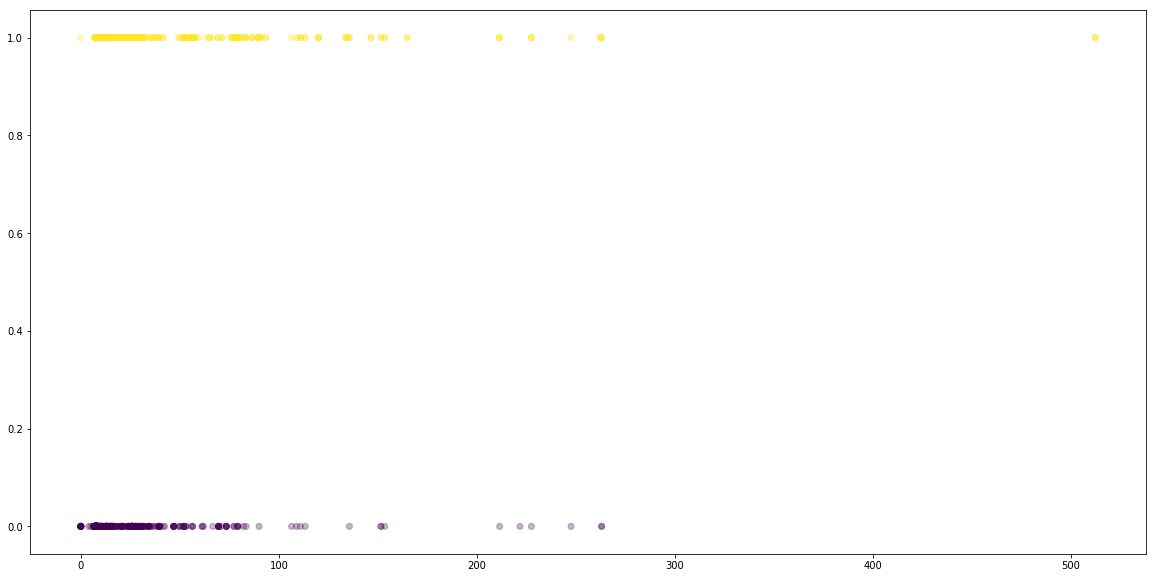

In [19]:
X = df[["Fare"]].copy()
y = df["Survived"]

plt.scatter(X, y, alpha=0.3, c=y)

In [13]:
X["Age"].mean()

29.69911764705882

In [20]:
colname = "Fare"
X[colname] = X[colname].fillna(X[colname].mean())

In [21]:
y_test_score

array([-0.55958015, -0.52475583, -0.43849854, -0.33255213, -0.33255213,
       -0.37795773, -0.83201376, -0.60498575, -0.45363374, -0.57471535,
       -0.49903934, -0.53687734, -0.49903934, -0.68066175, -0.83201376,
       -0.52475583, -0.95309537, -0.58985055, -0.39309293, -0.60498575,
       -0.80174336, -0.43849854, -0.39309293, -0.52475583, -0.43849854,
       -0.52475583, -0.63525615, -0.10552412, -0.15092972, -0.52475583,
       -0.52475583, -0.52475583, -0.43849854, -0.49903934, -0.92282497,
       -0.51417454, -0.36282253, -0.40822814, -0.98336577, -0.10552412,
       -0.52475583, -0.52475583, -0.42336334, -0.83201376, -0.71093216,
       -0.52475583, -0.34768733, -0.46876894, -0.51417454, -0.40822814,
       -0.48390414, -0.78660816, -0.55958015, -0.13579452, -0.83201376,
       -0.86228417, -0.39309293, -0.51417454, -0.52475583, -0.52475583,
       -0.33255213, -0.52475583, -0.60498575, -0.10552412, -0.52475583,
       -0.52475583, -0.49903934, -0.65039135, -0.42336334, -0.52

In [16]:
# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# 4. Fit model to train data.
clf.fit(X_train, y_train)

# 5. Evaluate model on test data.
from sklearn.metrics import f1_score, precision_score, roc_auc_score, recall_score, accuracy_score
y_test_hat = clf.predict(X_test)
y_test_score = clf.decision_function(X_test)
print("F1-score :", f1_score(y_test, y_test_hat))
print("AUC :", roc_auc_score(y_test, y_test_score))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("Accuracy score :", accuracy_score(y_test, y_test_hat))

F1-score : 0.0
AUC : 0.47810282153366807
Precision : 0.0
Recall : 0.0
Accuracy score : 0.5932835820895522


/home/bartek/Envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bartek/Envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bartek/Envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
list(data.target_names)

['malignant', 'benign']

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

So if target is 0 the cancer is __malignant__. Otherwise, if the target is 1, the canser is __benign__.

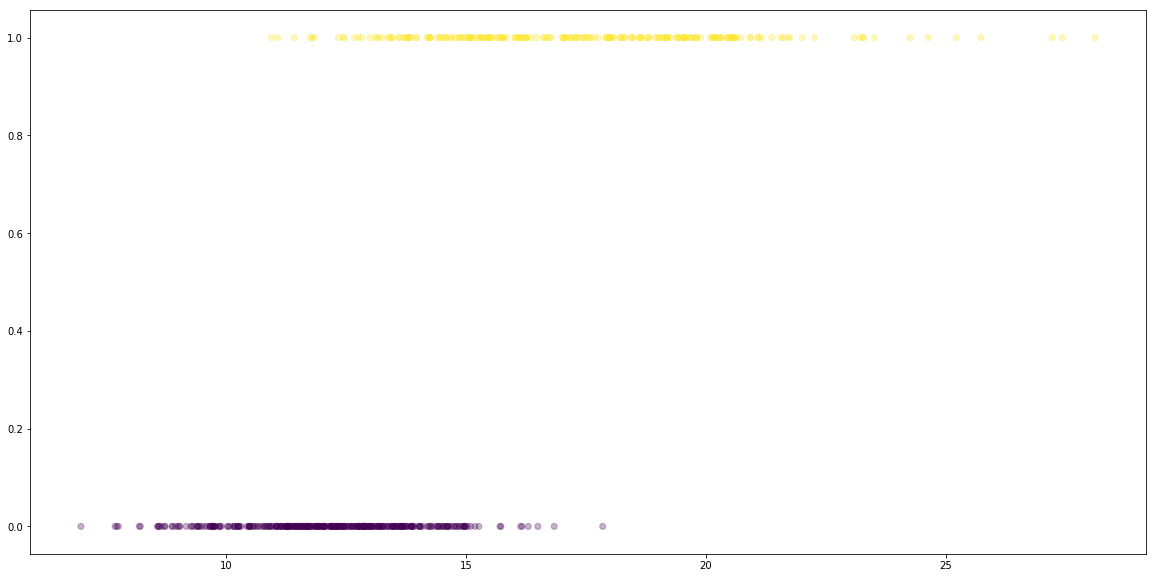

In [5]:
y = data.target == 0 # if zero then we dedect malignant cancer.

plt.scatter(data.data[:, [0]], y, alpha=0.3, c=y)

In [6]:
# 1. Prepare data
X = data.data[:, [0]]
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# 4. Fit model to train data.
reg.fit(X_train, y_train)

# 5. Evaluate model on test data.
from sklearn.metrics import mean_squared_error, r2_score
y_test_hat = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_hat)), r2_score(y_test, y_test_hat)

(0.3180844231652842, 0.5651767881666505)

But we want to predict if it is dedect malignant cancer or not. Let's look at $\hat{y}$.

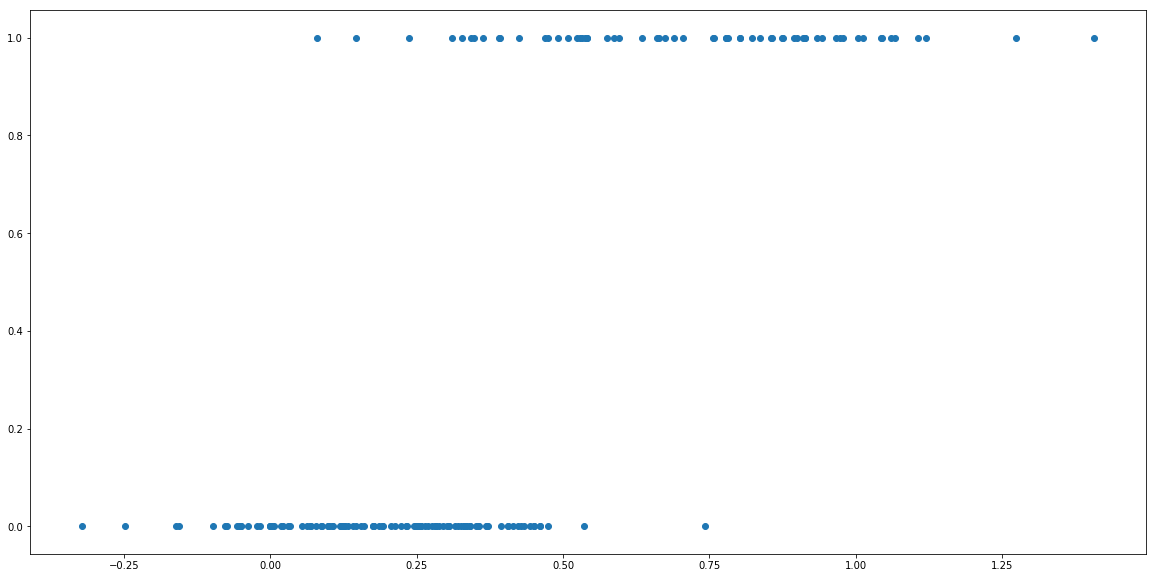

In [7]:
plt.scatter(y_test_hat, y_test )

## Accuracy

In [8]:
y_test_hat = y_test_hat >= 0.5

In [9]:
n_sample = len(y_test)
correct_prediction = sum(y_test == y_test_hat)

# Accuracy
correct_prediction/n_sample

0.9064327485380117

90%! not bad

## Confusion matrix

In [10]:
true_positive = sum(y_test & y_test_hat)
false_positive = sum(~y_test & y_test_hat)
true_negative = sum(~y_test & ~y_test_hat)
false_negative = sum(y_test & ~y_test_hat)

pd.DataFrame({
        "Predicted 0": [true_negative, false_positive], 
        "Predicted 1": [false_negative, true_positive]
    },
    index= ["Actual 0", "Actual 1"]
)


,Predicted 0,Predicted 1
Actual 0,106,14
Actual 1,2,49


In [11]:
# 1. Prepare data
X = data.data[:, [0]]
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

# 4. Fit model to train data.
reg.fit(X_train, y_train)

# 5. Evaluate model on test data.
from sklearn.metrics import accuracy_score
y_test_hat = reg.predict(X_test)
accuracy_score(y_test, y_test_hat)

/home/bartek/Envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9122807017543859